## README file for ``Collision_approx.py`` 


This code approximates neutrino-electron/positron collisions in the early universe. It is run in ``var_code.py`` (see https://github.com/hannahrasmussen/BasicCode). To make a ``CollisionApprox`` package, execute the following steps:

1. Navigate to the directory that your BasicCode folder is in. Make a folder there called ``CollisionApprox``, then make a folder within ``CollisionApprox`` that is also named ``CollisionApprox``.
2. Download ``Collision_approx.py`` from my GitHub page at https://github.com/hannahrasmussen/CollisionaApprox (you've probably already done that if you're reading this) and put it in the folder within the folder.
3. In the folder (not the folder within the folder), put a ``setup.py`` folder with the following code:
        from setuptools import setup
        setup(name='CollisionApprox',
          version='0.1',
          description='Approximates neutrino-electron/positron collisions in the early universe',
          url='https://github.com/hannahrasmussen/CollisionApprox',
          author='Hannah Rasmussen',
          author_email='hannahrasmussen17@gmail.com',
          license='MIT',
          packages=['CollisionApprox'],
          zip_safe=False)
          
4. Now, go to the terminal and checkout your new folder (not the folder within a folder) using the ‘cd’ command. 
5. Once you’re there, type and enter ‘pip install -e .’ (including the period). That ‘-e’ extension means that updates you make to the code are automatically also installed, which is obviously what we want.
6. Now, to see if it worked, open a separate jupyter notebook kernel and try and do ‘from CollisionApprox import Collision_Approx’. If there are no errors, you can delete that line and should be good to run the code as is.

To run this code, you will also need to download and install the ``nu_e_coll`` package. To make a ``nu_e_coll`` package, execute the following steps:

1. Navigate to the directory that your BasicCode folder is in. Make a folder there called ``nu_e_coll``, then make a folder within ``nu_e_coll`` that is also named ``nu_e_coll``.
2. Download ``nu_e_collisions.py`` from my GitHub page at https://github.com/hannahrasmussen/nu_e_coll (you've probably already done that if you're reading this) and put it in the folder within the folder.
3. In the folder (not the folder within the folder), put a ``setup.py`` folder with the following code:
        from setuptools import setup
        setup(name='nu_e_coll',
          version='0.1',
          description='Neutrino-electron/positron collision code',
          url='https://github.com/hannahrasmussen/nu_e_coll',
          author='Hannah Rasmussen',
          author_email='hannahrasmussen17@gmail.com',
          license='MIT',
          packages=['nu_e_coll'],
          zip_safe=False)
          
4. Now, go to the terminal and checkout your new folder (not the folder within a folder) using the ‘cd’ command. 
5. Once you’re there, type and enter ‘pip install -e .’ (including the period). That ‘-e’ extension means that updates you make to the code are automatically also installed, which is obviously what we want.
6. Now, to see if it worked, open a separate jupyter notebook kernel and try and do ‘from nu_e_coll import nu_e_collisions’. If there are no errors, you can delete that line and should be good to run the code as is.

## Imports 

* installs ``numpy``, a python package that allows for quick and easy computing using multi-dimensional arrays
* installs ``numba`` a python package designed to interface with ``numpy`` and make the code run significantly faster (at least one order of magnitude)
* ``matplotlib.pyplot`` is a python package that provides a wide variety of 2-dimensional plotting options. 
* ``nu_e_coll`` is a package that contains ``nu_e_collisions.py``, which self-consistently calculates the change to a given neutrino distribution function due to neutrino-electron collisions
* ``scipy.interpolate`` is a python package that contains functions for interpolation, including cubic spline interpolation, which uses piece wise third order polynomials to approximate a curve. 
* ``scipy.optimize`` is a python package for root finding, curve fitting, and more. We import ``curve_fit`` to fit a model of changes in $f$ due to neutrino-electron collision to the "true" model from ``nu_e_collisions.py``.

## Constants

* Gauss-Laguerre quadrature: A mathematical tool to evaluate any integral from $[0,\infty)$ using Laguerre polynomials. You send $n$ to the function and it returns the $n$ roots of the $n^{\rm th}$ Laguerre polynomial. These $n$ roots are ``x_values``. Each root has a corresponding weight in ``w_values``. By evaluating $\sum_{i=1}^n w_i * e^{x_i}f(x_i)$, an approximation for $\int_0^{\infty} f(x) dx$ is returned.
* ``x_values``: The $n$ roots of the $n^{\rm th}$ Laguerre polynomial
* ``w_values``: The weights that correspond to ``x_values``
* ``Gf``: Fermi constant, $G_F = 1.166 \times 10 ^{-11} \text{ MeV}^{-2}$
* ``me``: Electron mass, $m_e = 0.511 \text{ MeV}$
* ``g``: Multiplicity of electrons at this point in the universe, $g=2$

## Functions

### ``f`` 
* **Imports**
    * ``p``: Array of neutrino momenta 
    * ``Tcm``: Comoving temperature, $T_{\rm cm} = 1/a$
    * ``c``: I'm not really sure what this constant does, but we've been using $c = 0.9Ta$
* **Outputs**:
    * ``f``: Occupation fraction of neutrinos when they are decoupled?? Since we're saying $T_{\rm cm}$ is their characteristic temperature? $f = \frac{1}{e^{c*p/T_{\rm cm}}+1}$
    
### ``f_eq`` 
* **Imports**
    * ``p``: Array of neutrino momenta 
    * ``T``: Plasma temperature
    * ``eta``: The chemical potential for neutrinos I suppose? We've been using $\eta = 0$ so far for the chemical potential for electrons (maybe since they're in equilibrium?) but we don't do that here...
* **Outputs**:
    * ``f``: Occupation fraction of neutrinos if they were coupled with the plasma?? Since we're saying $T$ is their characteristic temperature? $f_{\rm eq} = \frac{1}{e^{p/T-\eta}+1}$
    
### ``n_e`` 
This function returns the total electron number density by using a Gauss Laguerre quadrature that integrates over electron momenta (i.e., ``x_values`` stands in for electron momenta here), $\displaystyle n_e = \frac{g}{2\pi^2} \int_0^{\infty} \frac{p_{e}^2}{e^(E_e/T)+1)}$
* **Imports**
    * ``T``: Plasma temperature
* **Calculations**
    * ``E_array``: Array of electron energies, $E_e^2 = \sqrt{p_e^2+m_e^2}$
* **Outputs**:
    * ``ne``: The total number density of electrons as calculated using Gauss-Laguerre quadrature. The summation is over ``x_values``, which represent electron momenta, and Gauss-Laguerre quadrature requires each term in the summation to be multiplied by its corresponding weight in ``w_values``. I'm not really sure where, but somehow this integrand is "weighted" (poor choice of words because I think the "w" in ``w_values`` comes from "weighted" but they're not the same thing apparently, grr) by $e^{-x_i}$, so we multiply the integrand by $e^{x_i}=e^{p_{e_i}}$. In conclusion, this funciton returns $\displaystyle n_e = \frac{g}{2\pi^2} \sum_{i=0}^{N} e^{p_{e_i}} \rm{w}_i \frac{p_{e_i}^2}{e^(E_{e_i}/T)+1)}$
    
### ``cs_eta`` 
This function creates a cubic spline designed to output $\eta$ for a given $p^2f$ value. The spline must be recreated at every step as it depends on $T$.
* **Imports**
    * ``T``: Plasma temperature
    * ``Tcm``: Comoving temperature, $T_{\rm cm} = 1/a$
    * ``c``: I'm not really sure what this constant does, but we've been using $c = 0.9Ta$
* **Calculations**
    * ``eta_arr``: A large array of values of eta ranging from -10 to 10, to hopefully account for any possible values of $\eta$ that could arise from the cubic spline
    * ``integral_arr``: An array that is a function of ``eta_arr``. We use a Gauss-Laguerre quarature here as well to evaluate each index of ``integral_arr``, and here ``x_values`` represent neutrino momenta. ``integral_arr`` $ \displaystyle  = \sum_{i=0}^{n-1} e^{p_i} w_i p_i^2 f_{\rm eq}(p_i,T,\eta)$
    * ``cs``: The cubic spline function which takes $\displaystyle \sum_{i=0}^{n-1} e^{p_i} w_i p_i^2 f_{\rm eq}$ as the independent variable and returns a corresponding $\eta$.
    * ``integral``: The argument sent to ``cs`` to calculate ``eta``, $\displaystyle \sum_{i=0}^{n-1} e^{p_i} w_i p_i^2 f(p_i,T_{\rm cm},c)$
* **Outputs**:
    * ``eta``: An approximation of the chemical potential of neutrinos from the cubic spline, inherently dependent on $T$ and $T_{\rm cm}$ the way this code is written
    
### ``model_An`` 
Calculates and returns the fitting parameters $A$ and $n$ to be used in approximating the $\nu$-$e$ collision integral in ``var_code.py``.
* **Imports**
    * ``a``: Scale factor
    * ``T``: Plasma temperature
    * ``c``: I'm not really sure what this constant does, but we've been using $c = 0.9Ta$
    * ``npts``: Number of points that will be in ``e_arr``, defaults to 201
    * ``etop``: Maximum $\epsilon$ value that will be used to make ``e_arr``, defaults to 20
* **Calculations**
    * ``e_arr``: Array of epsilon values whose length is ``npts`` and whose maximum value is ``etop``
    * ``bx``: Boxsize of ``e_arr``
    * ``eta``: The chemical potential of neutrinos as returned by ``cs_eta``
    * ``ne``: Number density of electrons as returned by ``n_e``
    * ``p_arr``: Array of momenta of neutrinos, $p = \epsilon/a$
    * ``f_arr``: Array of neutrino occupation fraction, again I think this really needs to be sent to this function from ``var_code.py``. As of right now, ``f_arr`` is calculated by the function ``f``, which I think assumes that the neutrinos exhibit a thermal distribution function with characteristic temperature $T_{\rm cm}$.
    * ``feq_arr``: The neutrino distribution if it were in thermal equilibirum with the plasma as calculated by ``f_eq``.
    * ``net``: The "true" $\nu$-$e$ collision integral for this scale factor and temperature that we will be modeling
    * ### ``C_local`` 
    This is the function we are trying to optimize when we call the function ``curve_fit``. 
    * **Imports**
        * ``p_array``: Array of neutrino momenta
        * ``A``: The fitting parameter $A$
        * ``n``: The fitting parameter $n$
    * **Outputs**:
        * ``C_array``: $ \displaystyle \left. \frac{df}{da} \right\vert_{\rm \nu \text{-} e^{\pm} \, scattering} \approx -A n_e G_{\rm F}^2 p^n T^{2-n} \left(f-f_{\rm eq}\right) $
    * ``popt``: To get the best fitting values for $A$ and $n$, we call ``curve_fit`` from ``scipy.optimize``, which takes the three arguments of ``f``, ``xdata``, and ``ydata``. We send ``C_local`` as ``f``, ``p_arr[0.5*len(p_arr)]`` as ``xdata``, and ``net[0.5*len(p_arr)]`` as ``ydata``. ``curve_fit`` optimizes all values of the parameters for ``f`` such that the sum of the squared residuals of ``f(xdata, *popt) - ydata`` is minimized. These best fitting values are returned as an array in ``popt``, so in our case, $A =$ ``popt[0]`` and $n =$ ``popt[1]``.
    * ``pcov``: The covariance of ``popt`` as returned by ``curve_fit``. We don't use this, but ``curve_fit`` returns it, so we need a place for it to go.
* **Outputs**:
    * ``A``: The first of two fitting parameters we use to approximate the $\nu-e$ collision integral in $ \displaystyle \left. \frac{df}{da} \right\vert_{\rm \nu \text{-} e^{\pm} \, scattering} \approx -A n_e G_{\rm F}^2 p^n T^{2-n} \left(f-f_{\rm eq}\right) $.
    * ``n``: The second of two fitting parameters we use to approximate the $\nu-e$ collision integral in $ \displaystyle \left. \frac{df}{da} \right\vert_{\rm \nu \text{-} e^{\pm} \, scattering} \approx -A n_e G_{\rm F}^2 p^n T^{2-n} \left(f-f_{\rm eq}\right) $.
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Collision_approx as ca
rg = np.random.default_rng(seed=2054)
x_values, w_values = np.polynomial.laguerre.laggauss(100) 
Gf = 1.166*10**-11 
me = .511 
g = 2 

def n_e(T): 
    E_array = np.sqrt(x_values**2 + me**2) 
    integral = np.sum((np.e**x_values)*w_values*(x_values**2)/(np.e**(E_array/T)+1))
    return (g/(2*np.pi**2))*integral

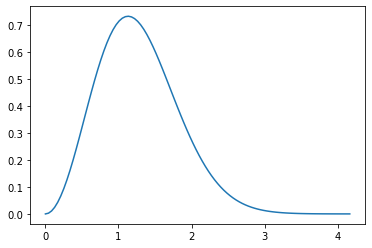

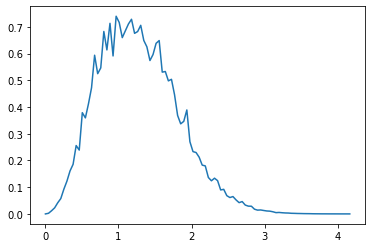

In [2]:
a = 1.2
T = 0.8 #proportional to temp
ne = n_e(T)
e_arr = np.linspace(0,5,100)
p_arr = e_arr/a
f_arr = np.sqrt(2/np.pi)*p_arr**2*(np.e**((-p_arr**2)/(2*T**2))/T**3) #thermal equilibrium probability distribution function

plt.figure()
plt.plot(p_arr,f_arr)
plt.show()

rand_arr = rg.standard_normal(len(p_arr))
f_arr = (f_arr*rand_arr/10)+f_arr

plt.figure()
plt.plot(p_arr,f_arr)
plt.show()

In [3]:
A_new, n_new = ca.model_An_new(a,T,0.9*T*a,e_arr,f_arr)

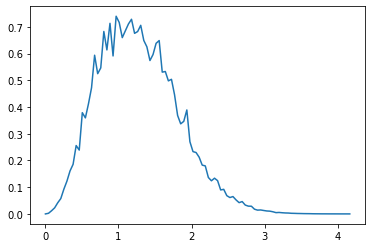

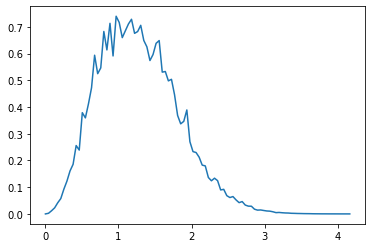

In [4]:
model_new = -A_new * ne * (Gf**2) * (T**(2-n_new)) * (p_arr**n_new) * (f_arr - ca.f_eq(p_arr, T, 0))

plt.figure()
plt.plot(p_arr,f_arr+model_new)
plt.show()

A_old, n_old = ca.model_An(a,T,0.9*T*a)
model_old = -A_old * ne * (Gf**2) * (T**(2-n_old)) * (p_arr**n_old) * (f_arr - ca.f_eq(p_arr, T, 0))

plt.figure()
plt.plot(p_arr,f_arr+model_old)
plt.show()

<ipython-input-5-c90823ab3de7>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(p_arr,abs(model_new-model_old)/abs(model_new+model_old))


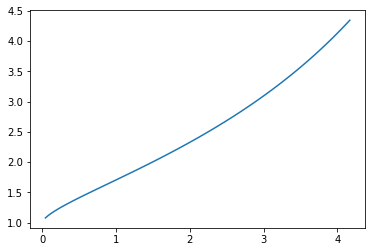

In [5]:
plt.figure()
plt.plot(p_arr,abs(model_new-model_old)/abs(model_new+model_old))
plt.show()